<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

/Users/longnguyen/Documents/GitHub/qtrl/qtrl/benchmarking/tomography.py:297: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if p is not 'I':
/Users/longnguyen/Documents/GitHub/qtrl/qtrl/sequencer/library_tools.py:35: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  prefix is not '' or suffix is not '') else 90
/Users/longnguyen/Documents/GitHub/qtrl/qtrl/sequencer/library_tools.py:35: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  prefix is not '' or suffix is not '') else 90
/Users/longnguyen/Documents/GitHub/qtrl/qtrl/sequencer/library_tools.py:37: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  prefix is not '' or suffix is not '') else 180
/Users/longnguyen/Documents/GitHub/qtrl/qtrl/sequencer/library_tools.py:37: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  prefix is not '' or suffix is not '') else 180


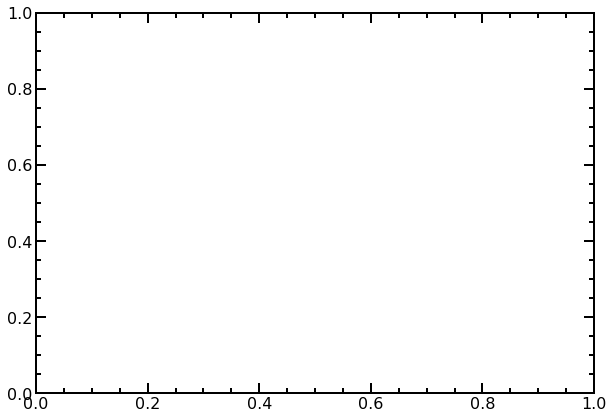

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
from scipy.special import eval_hermite as hpoly
import sys
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
from Fluxonium_hamiltonians import qchard_pshapes as pshapes
from Fluxonium_hamiltonians import qchard_evolgates as gates
from scipy.optimize import minimize
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
import scipy.linalg
from Fluxonium_hamiltonians import qchard_rotope as op
sys.path.append('/Users/longnguyen/Documents/GitHub/qtrl/')
from qtrl.benchmarking import tomography
from qtrl.analysis.state_tomography import generate_tomo_pulse_list, binary_arrays_to_bins, standard_tomography, \
    fidelity, purity, project_and_normalize_density_matrix, mcweeny_purification, dm_from_pulse, pauli_matrix, \
    renormalize_expectation_values, expectation_value_rho
from itertools import product
figpath = '/Users/longnguyen/Google Drive/LBL Research/Illustration/HCF paper/'

In [105]:
#Define qubit
wq = 0.5
H_nodrive = 0.5*wq*sigmaz()

#Define drive
T_gate = 40
shape = 'cos'
t_points = np.linspace(0, T_gate, 2 * int(T_gate) + 1)

#Evolve using propagator
# c_ops = c_ops(1e3, 1e3)
drag = False
drag_coeff = 0.0
U_ideal = sigmax()
state_0 = basis(2,0)
state_1 = basis(2,1)
P0 = state_0*state_0.dag()
P1 = state_1*state_1.dag()

coupl = 5.5 #MHz
# coupl = coupl*2*np.pi*1e-3
H_drive = coupl*sigmax()
H_dummy = 0*sigmax()
drive_freq_array = np.linspace(0.1,1.0,251)
leakage_array = np.zeros_like(drive_freq_array)
for idx, drive_freq in enumerate(drive_freq_array):
    U_t = gates.evolution_operator_microwave(H_nodrive, H_drive, t_points=t_points,T_gate=T_gate,DRAG = drag, DRAG_coefficient = drag_coeff, shape=shape, omega_d=drive_freq)
    trans_prob_00 = expect(state_0 * state_0.dag(),U_t*state_0)
    leakage_array[idx] = 1.0-trans_prob_00[-1]

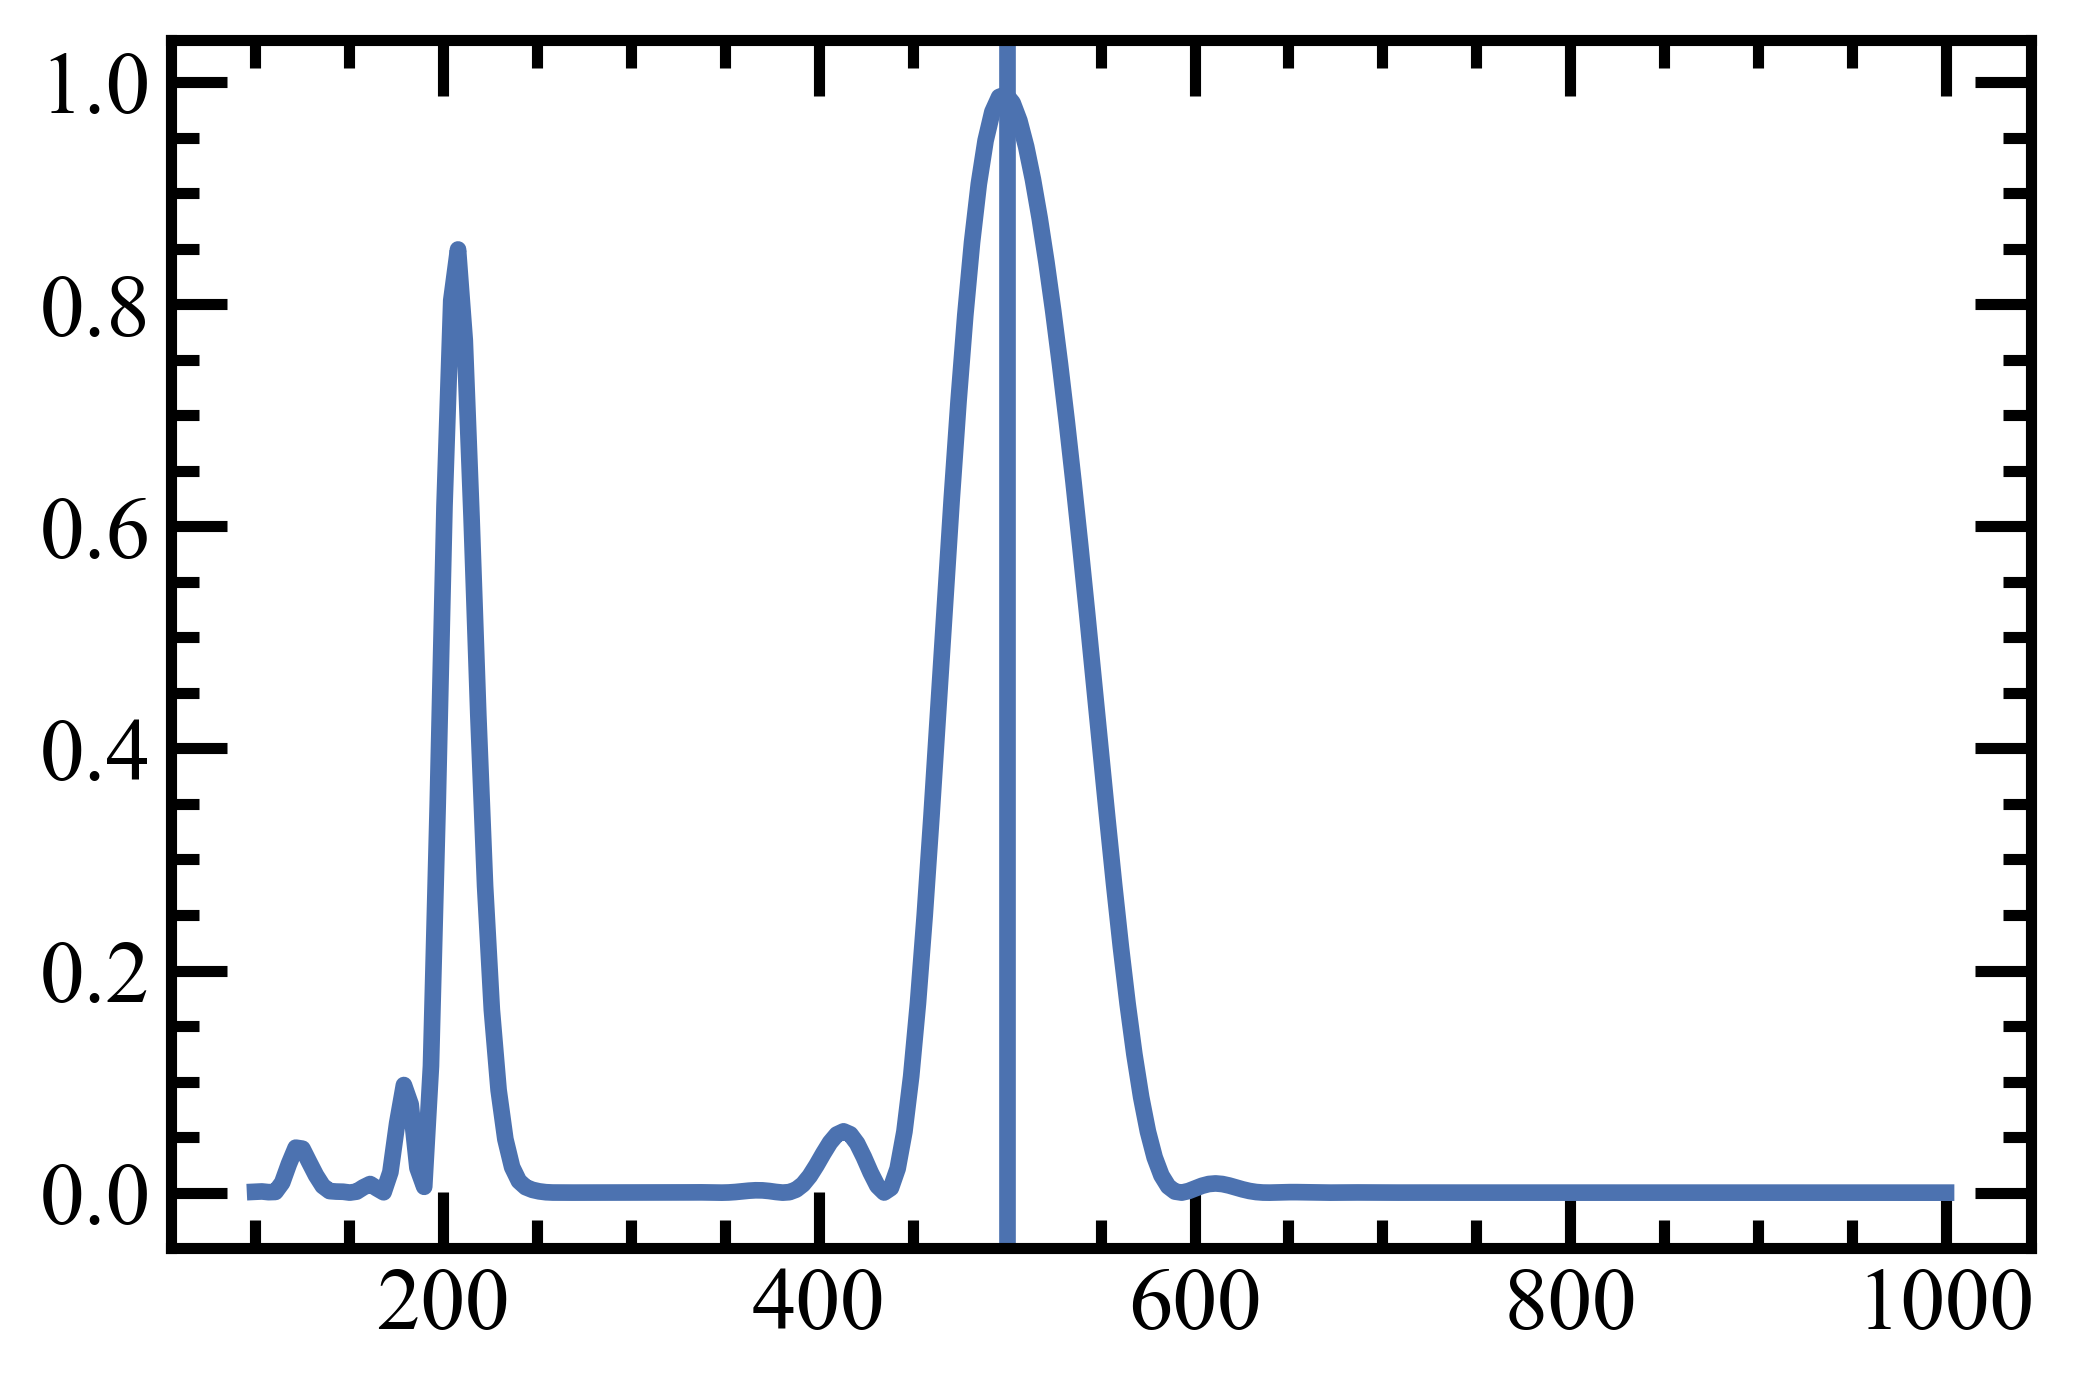

In [109]:
plt.plot(drive_freq_array*1e3, leakage_array)
plt.axvline(500)
# plt.axvline(210)

In [81]:
#Define qubit
wq = 1
H_nodrive = 0.5*wq*sigmaz()

#Define drive
T_gate = 100
shape = 'cos'
t_points = np.linspace(0, T_gate, 2 * int(T_gate) + 1)

#Evolve using propagator
# c_ops = c_ops(1e3, 1e3)
drag = False
drag_coeff = 0.0
U_ideal = sigmax()
state_0 = basis(2,0)
state_1 = basis(2,1)
P0 = state_0*state_0.dag()
P1 = state_1*state_1.dag()

coupl = 225 #MHz
coupl = coupl*2*np.pi*1e-3
H_drive = coupl*sigmax()
H_dummy = 0*sigmax()
drive_freq_array = np.linspace(0.1,1.2,101)
leakage_array = np.zeros_like(drive_freq_array)
for idx, drive_freq in enumerate(drive_freq_array):
    U_t = gates.evolution_operator_microwave_nonorm(H_nodrive, H_drive, t_points=t_points,T_gate=T_gate,DRAG = drag, DRAG_coefficient = drag_coeff, shape=shape, omega_d=drive_freq)
    trans_prob_00 = expect(P0,U_t*state_0)
    leakage_array[idx] = 1.0-trans_prob_00[-1]

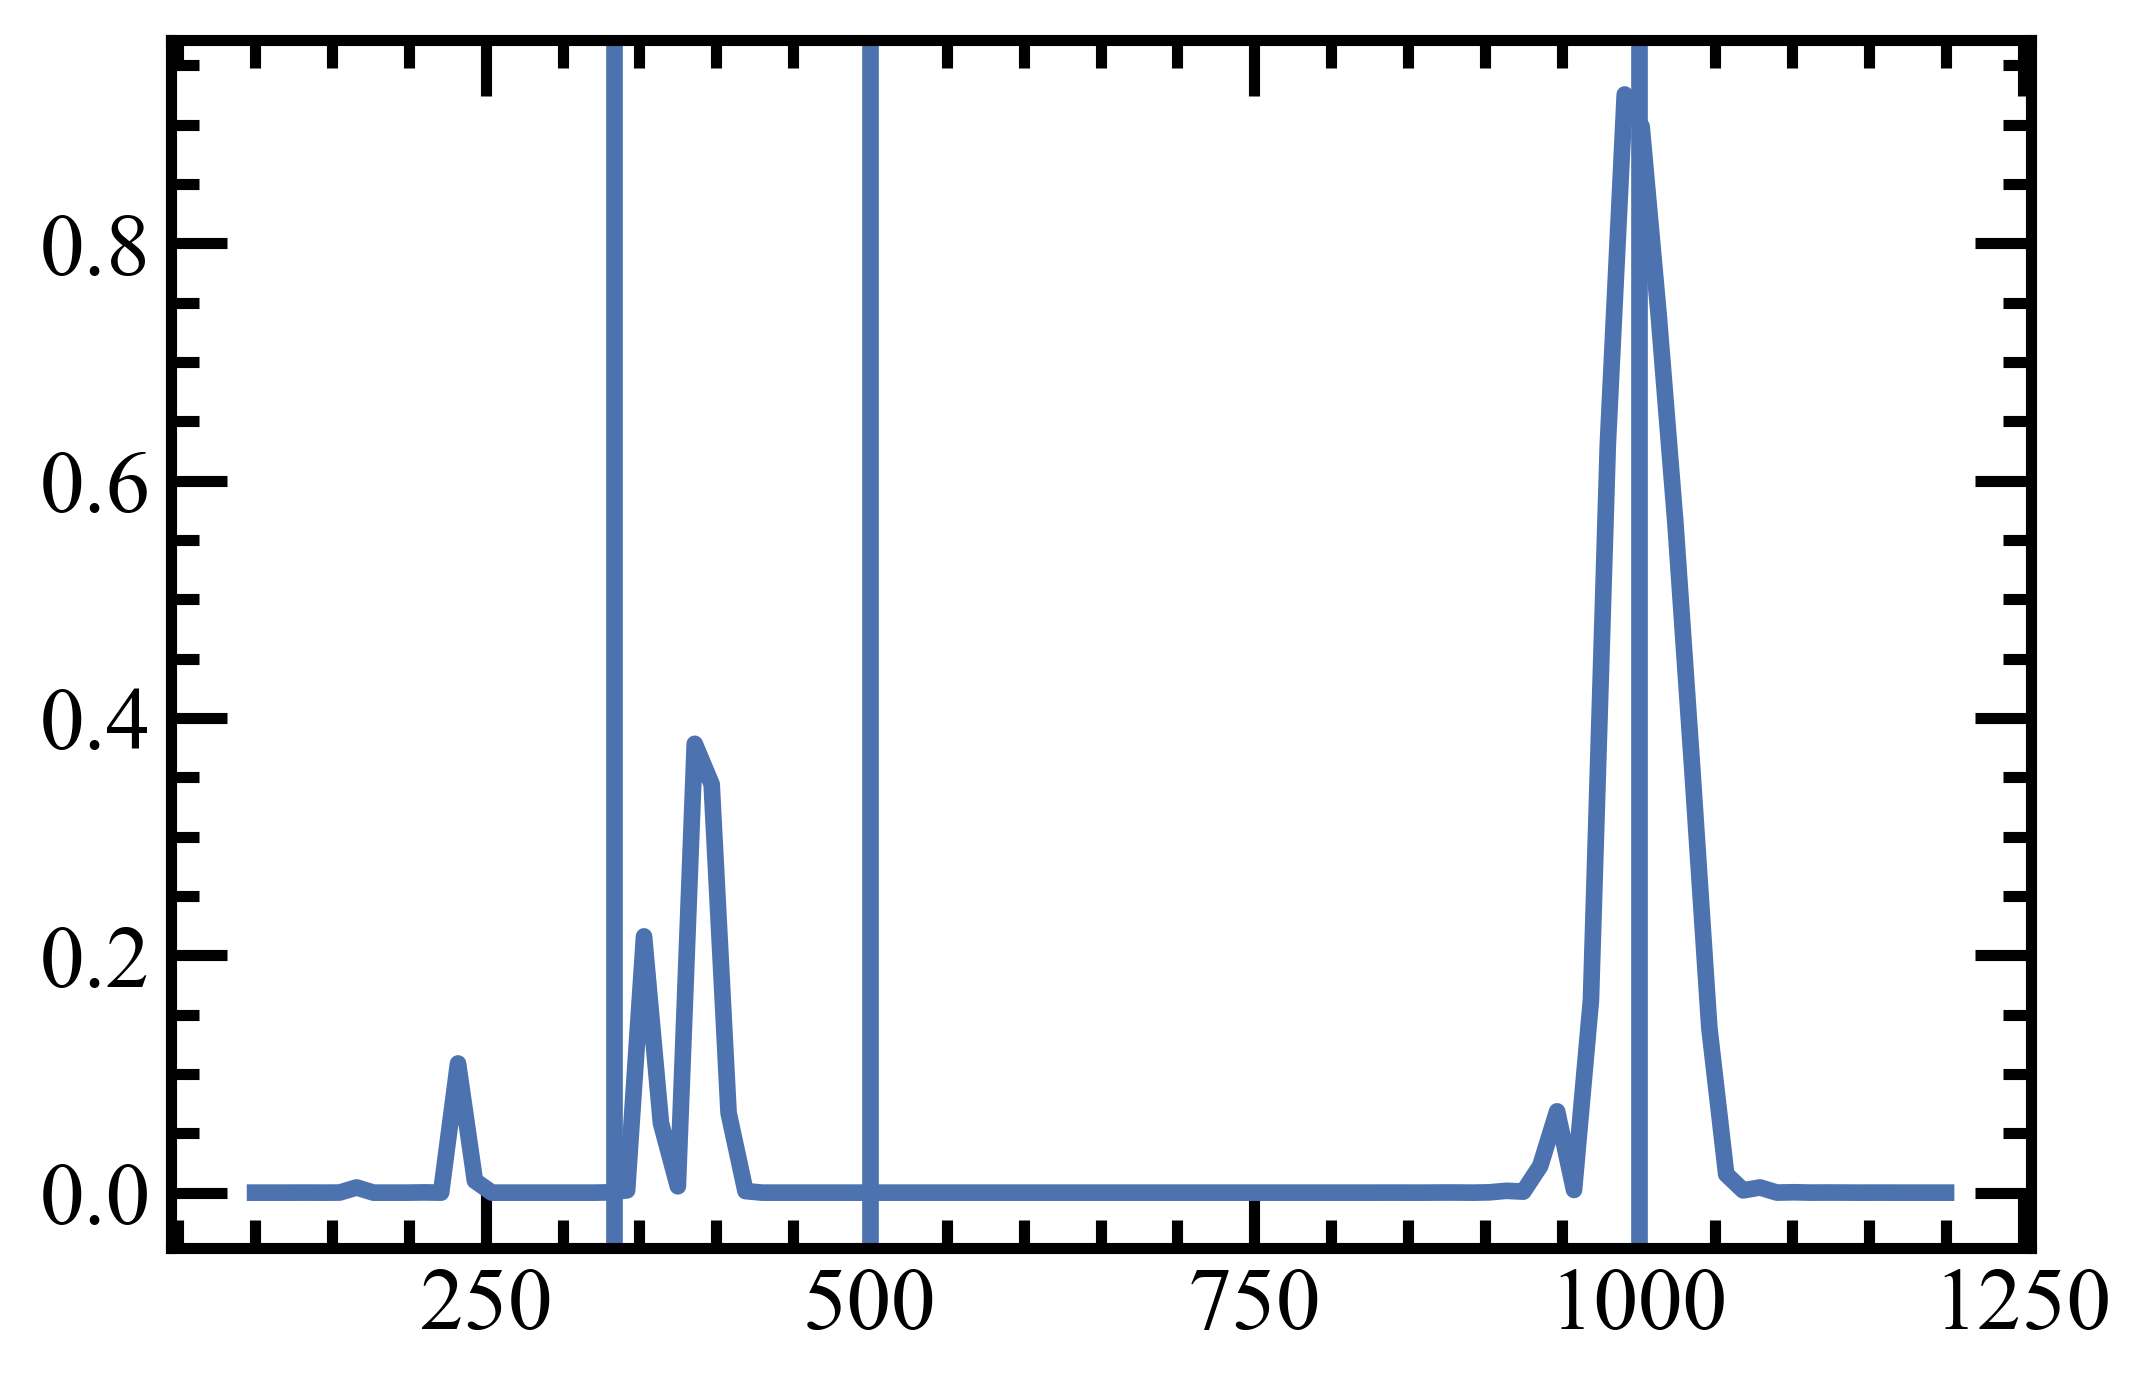

In [83]:
plt.plot(drive_freq_array*1e3, leakage_array,'-')
plt.axvline(1000)
plt.axvline(500)
plt.axvline(1000/3)